In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def my_int(value):# преобразование чисел с запятой в числа с точкой
    
    if type(value) == list:
        value = value[0]

    if len(value) == 1:       
        return int(value)
    else:
        value = list(map(str, value.split(',')))
        return int(value[0]) + (int(value[1]) / (10 ** len(str(value[1]))))

In [4]:
def mnk(data_x, data_y, g=0):# метод наименьших квадратов с расчетом погрешностей для коэффициентов
    #Взято с: 
    #https://npm.mipt.ru/books/lab-intro/main.pdf

    # s = np.array([[int(s1[i]), int(s1[i + 1])]for i in range(0, len(s1), 2)])
    s = np.array([[data_x[i], data_y[i]] for i in range(len(data_x))])
    sum_x = np.sum([i[0] for i in s])
    sum_y = np.sum([i[1] for i in s])
    sum_xy = np.sum([i[0] * i[1] for i in s])
    sum_xx = np.sum([i[0] * i[0] for i in s])

    a = ((len(s) * sum_xy) - (sum_x * sum_y)) / ((len(s) * sum_xx) - sum_x ** 2)# коэфициэент при x
    b = (sum_y - (a * sum_x)) / len(s)# свободный член


    y_mean = np.mean(sum_y)
    x_mean = np.mean(sum_x)
    D_yy = np.mean((data_y - y_mean) ** 2)
    D_xx = np.mean((data_x - x_mean) ** 2)
    # print(D_xx, D_yy, a)

    if g == 1:
        ga = ((1 / (len(s) - 2)) * (np.abs((D_yy / D_xx) - (a ** 2)))) ** (1/2)# погрешности для коэфициэнтов прямой построенной
        gb = ga * ((np.mean(data_x ** 2)) ** (1 / 2))# с помощью МНК
        # print(ga, gb)
        return a, b, ga, gb
    else:
        return a, b

In [5]:
def isnan(value): # проверка на nan
  try:
      import math
      return math.isnan(float(value))
  except:
      return False

In [6]:
def delet_nan(data, line=1):# убирание из списка nan элементов при line=0 возращфет список списков разграниченных элементом nan,
    # иначе просто удаляет nan

    s = []
    new_data = []

    if line == 0:
        for i in data:
            if not isnan(i):
                s.append(i)
            else:
                if len(s) != 0:
                    new_data.append(s)
                    s = []
                else:
                    s = []
        return new_data
    
    else:
        for i in data:
            if not isnan(i):
                new_data.append(i)
        return np.array(new_data)

In [7]:
# вытаскивание даты из таблиц

df = pd.read_csv(r'C:\Users\12345\PycharmProjects\Labs\1,2,2\Измерения для лаба 1.2.2 - Лист1.csv')# путь до csv таблицы
# print(df.columns)# все колонки таблицы

data = df['Название колонки']# считывание даты из колонки
data = delet_nan(data)
# data = [list(map(my_int, i.split('+-'))) for i in data]# разделение строки с значениями на int элементы


data_for_errorbar_y = delet_nan(df['погрешность b0 ср'], 0)# возращает все 
data_for_errorbar_y = np.array([my_int(i) for i in data_for_errorbar_y])


data_for_errorbar_x = delet_nan(df['погрешность Мн'])
data_for_errorbar_x = np.array([my_int(i) for i in data_for_errorbar_x]) / (10 ** 5)

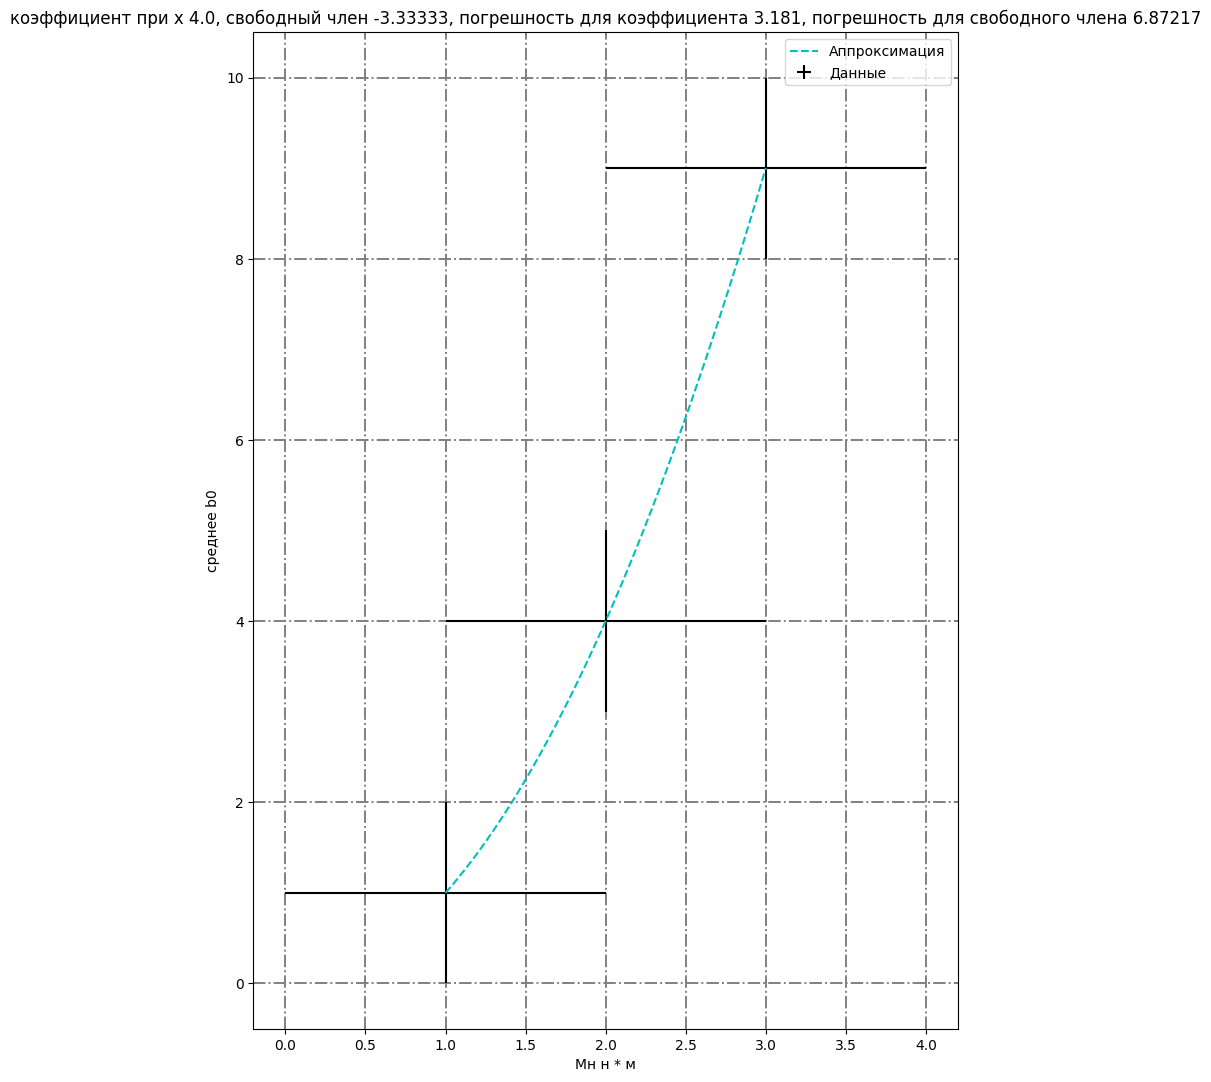

In [26]:
# адекватный график который можно размножить

plt.figure(figsize=(20,20))

data_x1 = np.array([1, 2, 3])#дата для постройки грфиков(первого графика, ось Y)
data_y1 = np.array([1, 4, 9])#дата для постройки грфиков(первого графика, ось X)
data_for_errorbar_x = 1
data_for_errorbar_y = 1

x_and_y = (3, 2)# размер грида для графиков
ax1 = plt.subplot2grid(x_and_y, (0, 0), rowspan=2)
xh1 = np.linspace(min(data_x1), max(data_x1), 100)# создание точек по x для полинома
n = 2
approximation_1 = np.polyfit(data_x1, data_y1, n)# создание полинома n степени (функции т.е. y = f(x^n))
approximation_data_1 = np.poly1d(approximation_1)# создание полинома n степени (функции т.е. y = f(x^n))

k, b, gk, gb = mnk(data_x1, data_y1, 1)# подсчет коэффициэтов для прямой построенное методом наименьших квадратов

ax1.errorbar(data_x1, data_y1, data_for_errorbar_y, data_for_errorbar_x, color = 'k', linestyle = 'None', label="Данные")
ax1.plot(xh1, approximation_data_1(xh1),'c--', label="Аппроксимация")
ax1.set_title(f'коэффициент при x {round(k, 3)}, свободный член {round(b, 5)}, погрешность для коэффициента {round(gk, 3)}, погрешность для свободного члена {round(gb, 5)}')# название графика
ax1.set_xlabel('Мн н * м')# наименование оси X
ax1.set_ylabel('среднее b0')# наименование оси Y
ax1.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
ax1.legend()


plt.savefig('mygraph.pdf', dpi=1200)